## Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

## Round 1

- Import the required libraries and modules that you would need

- Read that data into Python and call the dataframe churnData

- Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function

- Check for null values in the dataframe. Replace the null values

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

- Split the data into a training set and a test set

- Scale the features either by using normalizer or a standard scaler

- Fit a logistic Regression model on the training data

- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

## Data Preprocessing

In [7]:
import pandas as pd 

In [8]:
churnData = pd.read_csv('DATA_Customer-Churn.csv') # import csv, create dataframe 

In [9]:
churnData # display dataframe 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [10]:
churnData.info() # get overview of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [11]:
# Count null values in each column of the DataFrame
null_counts = churnData.isnull().sum()

# Print the null value counts
print(null_counts)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce') # By adding errors='coerce', the function will convert non-numeric values to NaN, 
# allowing the conversion to proceed without raising an error.

In [13]:
# Print the null value counts
print(null_counts)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [15]:
# Filter the DataFrame to show only entirely duplicated rows
duplicate_rows = churnData[churnData.duplicated(keep=False)]

# Print the duplicated rows
print(duplicate_rows)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
22      Male              0      No         No       1          Yes   
33      Male              0      No         No       1          Yes   
100     Male              0      No         No       1          Yes   
128     Male              0      No         No       1          Yes   
211   Female              0      No         No       1           No   
...      ...            ...     ...        ...     ...          ...   
6706  Female              0      No         No       1          Yes   
6764  Female              0      No         No       1          Yes   
6774  Female              0      No         No       1          Yes   
6789  Female              0      No         No       1          Yes   
6924    Male              0      No         No       1          Yes   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
22    No internet service  No internet service  No internet service   
33   

In [16]:
# Drop entirely duplicated rows from the DataFrame
churnData.drop_duplicates(inplace=True)

In [17]:
# List of columns to keep
columns_to_keep = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Drop all columns except the ones in columns_to_keep
churnData.drop(columns=churnData.columns.difference(columns_to_keep), inplace=True)
churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [18]:
# Assuming churn is my target variable

churnData['Churn'].nunique

<bound method IndexOpsMixin.nunique of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 6994, dtype: object>

In [19]:
churnData['Churn']=churnData['Churn'].map({'No': 0, 'Yes': 1})

In [20]:
churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [21]:
churnData = churnData.dropna()

In [22]:
# Reset the index of the DataFrame
churnData.reset_index(drop=True, inplace=True)

## Split data into train and test set and apply StandardScaler

In [23]:
from sklearn.model_selection import train_test_split

X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

ss = StandardScaler()
ss.fit(X_train)
X_train_log = ss.transform(X_train)
X_test_log = ss.transform(X_test)


## Fit a logistic regression model on the training data 

In [24]:
log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


,Error_metric,Train,Test
0,Accuracy,0.790548,0.801718
1,Precision,0.647239,0.715356
2,Recall,0.434156,0.487245


## Fit a KNN classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

# We do not use scaled X here as this is a distance based algorithm and scaling can affect the distances 

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.832796,0.762348
1,Precision,0.739488,0.598684
2,Recall,0.554870,0.464286


## Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the error metric on the test data.
- Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth

## Fit a Decision Tree Classifier on the training data and check error metric on test data 

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.783029,0.790981
1,Precision,0.640091,0.703252
2,Recall,0.385460,0.441327


### Confusion matrix 

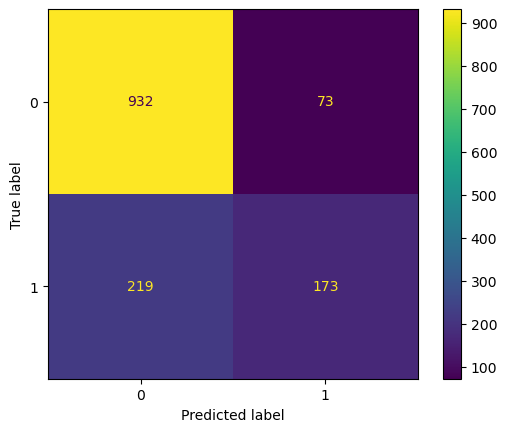

In [36]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
# Analysis: in this example, there are 219 cases where we predicted a client would be retained but where that client churned in reality 

### Feature importance

<BarContainer object of 4 artists>

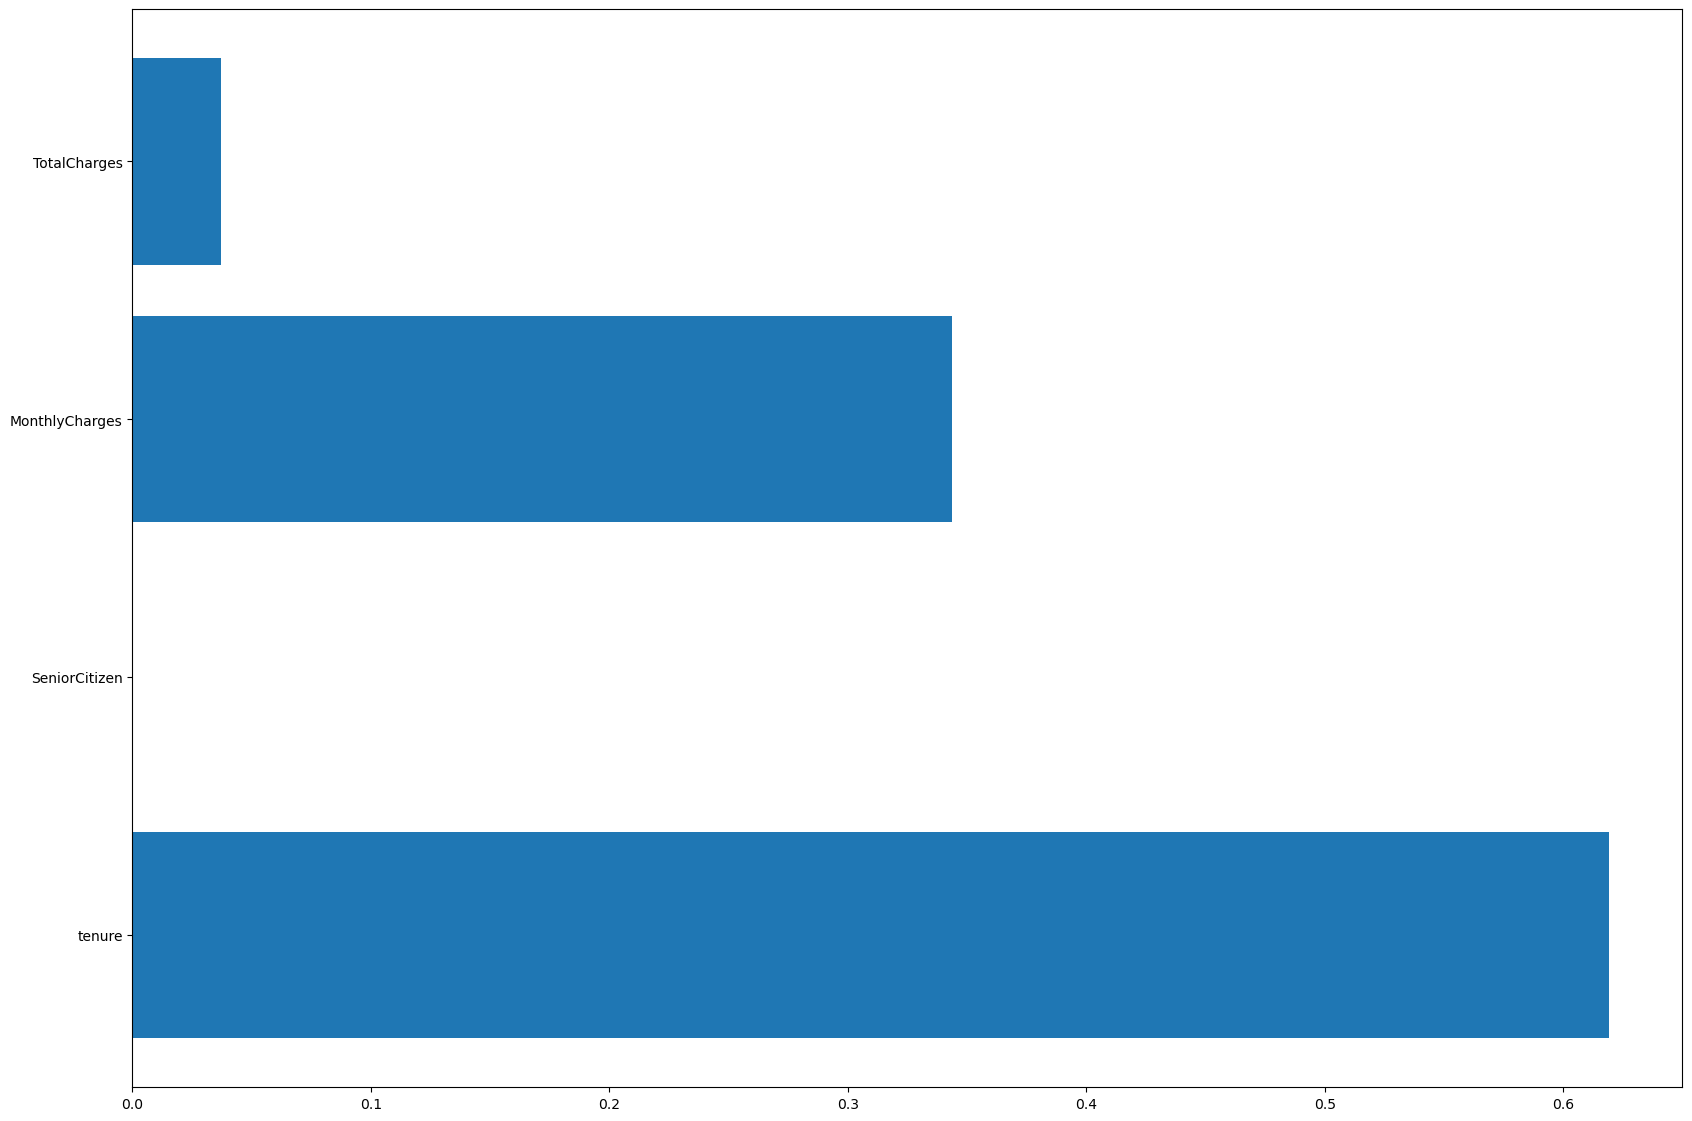

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

In [ ]:
# Analysis: Tenure has the most significant impact on churn 

## Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_test_decision_tree(X, y):
    """
    Train and test a Decision Tree Classifier with different max_depth values.
    
    Parameters:
        X (array-like): Input features.
        y (array-like): Target variable.
        
    Returns:
        dict: A dictionary containing max_depth values as keys and corresponding error metrics
              (accuracy, precision, recall) on both train and test data as values.
    """
    results = {}
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    max_depth_values = range(1, 21)  # Max depth values from 1 to 20
    
    for max_depth in max_depth_values:
        # Initialize and train the Decision Tree Classifier
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)
        
        # Make predictions on the training set
        y_train_pred = clf.predict(X_train)
        # Make predictions on the testing set
        y_test_pred = clf.predict(X_test)
        
        # Calculate error metrics for training data
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        
        # Calculate error metrics for testing data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        
        # Store the results
        results[max_depth] = {
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall
        }
    
    # Print the results in tabular format
    print("Max Depth\tTrain Accuracy\tTrain Precision\tTrain Recall\tTest Accuracy\tTest Precision\tTest Recall")
    for max_depth, metrics in results.items():
        print(f"{max_depth}\t\t{metrics['Train Accuracy']:.4f}\t\t{metrics['Train Precision']:.4f}\t\t{metrics['Train Recall']:.4f}\t\t"
              f"{metrics['Test Accuracy']:.4f}\t\t{metrics['Test Precision']:.4f}\t\t{metrics['Test Recall']:.4f}")
    
    # Recommend the best performing max depth based on test accuracy
    best_accuracy_depth = max(results, key=lambda x: results[x]['Test Accuracy'])
    print(f"\nBest performing max depth based on Test Accuracy: \033[1m{best_accuracy_depth}\033[0m")
    
    # Recommend the best performing max depth based on precision
    best_precision_depth = max(results, key=lambda x: results[x]['Test Precision'])
    print(f"Best performing max depth based on Precision: \033[1m{best_precision_depth}\033[0m")
    
    # Recommend the best performing max depth based on recall
    best_recall_depth = max(results, key=lambda x: results[x]['Test Recall'])
    print(f"Best performing max depth based on Recall: \033[1m{best_recall_depth}\033[0m")
    
    return results

# Example usage:
# results = train_test_decision_tree(X, y)

In [48]:
results = train_test_decision_tree(X, y)
print(results)

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max Depth	Train Accuracy	Train Precision	Train Recall	Test Accuracy	Test Precision	Test Recall
1		0.7333		0.0000		0.0000		0.7423		0.0000		0.0000
2		0.7837		0.6506		0.4087		0.7888		0.6540		0.3833
3		0.7837		0.6506		0.4087		0.7888		0.6540		0.3833
4		0.7868		0.6253		0.5007		0.7924		0.6250		0.4861
5		0.7922		0.6214		0.5651		0.7824		0.5859		0.5306
6		0.8002		0.6725		0.4893		0.7731		0.5817		0.4250
7		0.8126		0.6905		0.5389		0.7724		0.5755		0.4444
8		0.8228		0.7367		0.5221		0.7838		0.6098		0.4472
9		0.8387		0.7369		0.6148		0.7595		0.5403		0.4472
10		0.8561		0.7762		0.6470		0.7674		0.5589		0.4611
11		0.8756		0.8372		0.6624		0.7566		0.5362		0.4111
12		0.8933		0.8498		0.7289		0.7559		0.5309		0.4528
13		0.9132		0.8960		0.7631		0.7495		0.5164		0.4361
14		0.9302		0.9237		0.8047		0.7487		0.5139		0.4611
15		0.9397		0.9452		0.8215		0.7337		0.4811		0.4250
16		0.9542		0.9530		0.8711		0.7373		0.4897		0.4639
17		0.9638		0.9587		0.9034		0.7301		0.4754		0.4556
18		0.9739		0.9706		0.9302		0.7251		0.4663		0.4

In [ ]:
# Analysis: As we aim to optimise to reduce false negatives (clients we predict to be retained but who indeed churn) so we should optimise for recall
# In this case we should set max depth of decision tree at 5 